In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import random 
import numpy as np
from IPython.display import display, clear_output
import time

In [ ]:
class rider():
    def __init__(self, x_dim, y_dim):
        self.location = (x_dim, y_dim)
        self.destination = ()
        
    def find_closest_available_driver():
        """
        When the rider spawns, it calculates the distance between him and all drivers without a passenger,
        and then chooses the closest one.
        """
        
    def give_driver_pickup_location():
        """ """
        
    def give_driver_destination():
        """
        When the driver reaches the rider for pick up, tell the driver the rider's destination
        (might be better suited as a function in driver class)
        """
        
    def measure_wait_time():
        """
        Storing a value that starts at 0 and is incremented in every iteration. 
        Not keeping track of actual time, iterations as a proxy for time.
        """
    
    def measure_ride_time():
        """
        Same as wait time, but measuring pick-up to drop-off.
        """

In [47]:
class driver():
    """Creates a driver capable of picking up riders and taking them to their destination. Drivers may only have 1 rider at a
    time and drive their rider directly to their destination immediately."""
    def __init__(self, x_dim, y_dim):
        """Defines a driver whose default location is randomly located within the dimensions of the world and who doesn't
        have a rider."""
        self.x = np.random.randint(0,x_dim)
        self.y = np.random.randint(0,y_dim)
        self.has_rider = False
        
    def move(self, rider, x_dim, y_dim, destination, chosen_rider = 0, closest=False):
        """"""
        
        "If ???, ???"
        if closest == True:
            self.drive_rider(destination = chosen_rider)
        
        "If the driver has a rider, ???. Otherwise, search for a rider."
        if self.has_rider == True:
            self.drive_rider(destination=destination)
        else:
            self.search_for_rider(x_dim, y_dim)
        
        "???"
        if rider[self.x, self.y] > 0:
            rider[self.x, self.y] -= 10
            self.has_rider = True
    
    def drive_rider(self, destination):
        x = self.x
        y = self.y
        
        if x == destination[0] and y == destination[1]:
            has_rider = False;
            return
            
        pick = np.zeros(x + y)
        pick[0:x] = 1
        if(np.random.choice(pick) == 1):
            x = x - 1
        else:
            y = y - 1

        if(x < 0):
            x = 0
        if(y < 0):
            y = 0
            
        self.x = x
        self.y = y
        
    def search_for_rider(self, x_dim, y_dim):
        x = self.x
        y = self.y
        
        directions = ['up', 'left', 'down', 'right']
        #First check to see if there is a rider up and to the right.
        g = [] #follow gradient
        m  = [] 
        
        distance = np.sqrt(self.x ** 2 + self.y ** 2)
        

        #pick a random direction.
        grad = random.choice(directions)
        

        # move the driver
        if(grad == 'up'):
            y = y + 1
        elif(grad == 'right'):
            x = x + 1
        elif(grad == 'down'):
            y = y - 1
        elif(grad == 'left'):
            x = x - 1
        else:
            print(grad)
            print("ERROR!!a!!!!!!!!!!")

        # Prevents driver from moving off the grid. 
        if(x < 0):
            x = 0
        if(y < 0):
            y = 0
        if(x > x_dim-1):
            x = x_dim-1
        if(y > y_dim-1):
            y = y_dim-1
        self.x = x
        self.y = y
        
    
        
    def draw(self):
        """Plots the driver green if they have a rider, red if they don't."""
        color = 'r'
        if (self.has_rider == True):
            color = 'g'
        plt.scatter(self.x, self.y, color=color)
    

In [48]:
#x_dim = 70
#y_dim = 30
#num_drivers = 2
#rider = np.zeros((70, 30))
#x = np.random.randint(0,70)
#y = np.random.randint(0,30)
#rider[x, y] = 10
#destination = [np.random.randint(0,70), np.random.randint(0,30)]
#dist_new = ((destination[0]- x) ** 2 + (destination[1] - y ** 2)) ** .5
#x = np.random.randint(0,x_dim)
#if x == destination[0] and y == destination[1]:
#    print(3)
#close_driver = 0
#drivers = [driver(x_dim,y_dim) for a in range(0,num_drivers)]

#for a in drivers:
    #close_driver = a
#close_driver.move(rider = rider, x_dim=x_dim, y_dim=30, destination = destination)

In [49]:
def run(num_drivers = 2, num_riders = 1, x_dim = 70, y_dim = 30):
    """Creates a world of size x_dim by y_dim with the specified number of drivers and riders and runs a simulation in which
    the drivers pick up riders and drop them off at their destinations."""
    
    
    """Initializes an array for the riders and their destinations."""
    rider = np.zeros((x_dim,y_dim))

    # Places the rider(s) and destination(s)
    for i in range(num_riders):
        r = np.random.randint(0,x_dim)
        t = np.random.randint(0,y_dim)
        rider[r, t] = 10
        destination = np.random.randint(0,x_dim), np.random.randint(0,y_dim)
        rider[destination] = 100
    
    # Creates a list of drivers.
    drivers = [driver(x_dim,y_dim) for a in range(0,num_drivers)]

    fig, ax = plt.subplots(figsize=(10,5))

    #Main simulation loop
    for i in range(0,100):
        
        #Assigns the driver closest to the rider as "close_driver"
        dist = 10000
        close_driver = 0
        for a in drivers:
            # Calculates "dist" the distance between the destination and the rider
            dist_new = (((int(destination[0])- int(r)) ** 2) + ((int(destination[1]) - int(t)) ** 2)) ** .5           
            if dist_new < dist:
                dist = dist_new
                close_driver = a
                    
        for a in drivers:
            if a == close_driver:
                a.move(rider = rider, x_dim=x_dim, y_dim=y_dim, destination=destination, chosen_rider = [r,t], closest = True)
            else:
                a.move(rider = rider, x_dim=x_dim, y_dim=y_dim, destination=destination)
    

        # Plots world
        plt.imshow(rider.T, origin='lower', aspect='equal')
        for a in range(0,num_drivers):
            drivers[a].draw()

        # Animaiton part (dosn't change)
        clear_output(wait=True) # Clear output for dynamic display
        display(fig)            # Reset display
        fig.clear()             # Prevent overlapping and layered plots
        time.sleep(0.0001)      # Sleep for a fraction of a second to allow animation to catch up


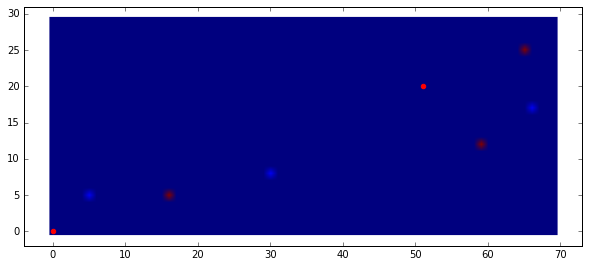

ValueError: a must be non-empty

In [50]:
##Blue is destination, red is rider, bright red points are drivers##
run(num_drivers = 2, num_riders = 3)